## Session 10 (numpy part f)

In [2]:
import numpy as np

In [3]:
a = np.array([1, 4, 7, 3, 1, 2])

In [4]:
np.max(a)

7

In [5]:
np.argmax(a)

2

In [6]:
np.argmin(a)

0

In [8]:
b = np.random.randint(10, 20, size=(3, 4))
b

array([[18, 16, 10, 15],
       [11, 15, 17, 10],
       [13, 12, 11, 15]])

In [9]:
np.argmax(b)

0

In [10]:
np.argmax(b, axis=1)

array([0, 2, 3])

In [11]:
np.argmax(b, axis=0)

array([0, 0, 1, 0])

### sorting arrays

In [12]:
a

array([1, 4, 7, 3, 1, 2])

In [15]:
np.sort(a)

array([1, 1, 2, 3, 4, 7])

In [16]:
np.argsort(a)

array([0, 4, 5, 3, 1, 2])

### applying a function over array elements

In [18]:
a + 1

array([2, 5, 8, 4, 2, 3])

In [20]:
result = np.zeros(a.shape)
for i, x in enumerate(a):
    result[i] = x + 1
    
result    

array([2., 5., 8., 4., 2., 3.])

In [23]:
def f(x):
    return x+1

np.apply_along_axis(f, 0, a)

array([2, 5, 8, 4, 2, 3])

In [24]:
np.apply_along_axis(lambda x: x*2, 0, a)

array([ 2,  8, 14,  6,  2,  4])

### rolling (sliding) window operations

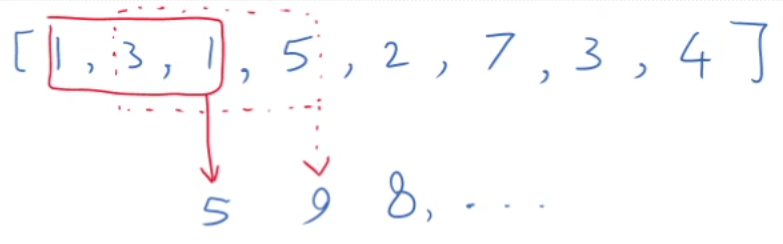

In [25]:
from numpy.lib.stride_tricks import sliding_window_view

In [26]:
d = np.array([1, 3, 1, 5, 2, 7, 3, 4])

In [28]:
wd = sliding_window_view(d, window_shape=3)
wd

array([[1, 3, 1],
       [3, 1, 5],
       [1, 5, 2],
       [5, 2, 7],
       [2, 7, 3],
       [7, 3, 4]])

In [29]:
np.sum(wd, axis=1)

array([ 5,  9,  8, 14, 12, 14])

In [30]:
np.sum(wd, axis=0)

array([19, 21, 22])

In [31]:
np.sum(wd)

62

### brent oil daily price example

In [76]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('brent-daily.csv')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [38]:
y = df.Price.values[:20]
x = np.arange(len(y))

In [41]:
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[18.63 18.45 18.55 18.6  18.63 18.6  18.6  18.58 18.65 18.68 18.75 18.78
 18.65 18.75 18.78 18.78 18.68 18.78 18.9  19.03]


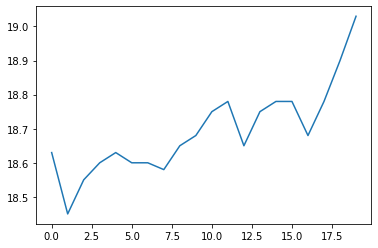

In [42]:
plt.plot(x, y)

### peak detection using sliding window

In [43]:
w = sliding_window_view(y, window_shape=5)
w

array([[18.63, 18.45, 18.55, 18.6 , 18.63],
       [18.45, 18.55, 18.6 , 18.63, 18.6 ],
       [18.55, 18.6 , 18.63, 18.6 , 18.6 ],
       [18.6 , 18.63, 18.6 , 18.6 , 18.58],
       [18.63, 18.6 , 18.6 , 18.58, 18.65],
       [18.6 , 18.6 , 18.58, 18.65, 18.68],
       [18.6 , 18.58, 18.65, 18.68, 18.75],
       [18.58, 18.65, 18.68, 18.75, 18.78],
       [18.65, 18.68, 18.75, 18.78, 18.65],
       [18.68, 18.75, 18.78, 18.65, 18.75],
       [18.75, 18.78, 18.65, 18.75, 18.78],
       [18.78, 18.65, 18.75, 18.78, 18.78],
       [18.65, 18.75, 18.78, 18.78, 18.68],
       [18.75, 18.78, 18.78, 18.68, 18.78],
       [18.78, 18.78, 18.68, 18.78, 18.9 ],
       [18.78, 18.68, 18.78, 18.9 , 19.03]])

In [55]:
def f(x):
    print(f'x is : {x}', end='\n')
    mid = len(x)//2
    print(x[mid] >= x, end='\n   ------------------------------   \n')
    return np.all(x[mid] >= x)

peak_loc = np.apply_along_axis(f, 1, w)
peak_loc

x is : [18.63 18.45 18.55 18.6  18.63]
[False  True  True False False]
   ------------------------------   
x is : [18.45 18.55 18.6  18.63 18.6 ]
[ True  True  True False  True]
   ------------------------------   
x is : [18.55 18.6  18.63 18.6  18.6 ]
[ True  True  True  True  True]
   ------------------------------   
x is : [18.6  18.63 18.6  18.6  18.58]
[ True False  True  True  True]
   ------------------------------   
x is : [18.63 18.6  18.6  18.58 18.65]
[False  True  True  True False]
   ------------------------------   
x is : [18.6  18.6  18.58 18.65 18.68]
[False False  True False False]
   ------------------------------   
x is : [18.6  18.58 18.65 18.68 18.75]
[ True  True  True False False]
   ------------------------------   
x is : [18.58 18.65 18.68 18.75 18.78]
[ True  True  True False False]
   ------------------------------   
x is : [18.65 18.68 18.75 18.78 18.65]
[ True  True  True False  True]
   ------------------------------   
x is : [18.68 18.75 18.78 18

array([False, False,  True, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False])

In [58]:
peak_loc.shape

(16,)

In [59]:
# as you see our peak_loc array shape doesn't match the y and x (peak_loc has 16 elements while y, x had 20),
# that's because applying sliding window reduces the size of result array because of it's operation on array.
# so we can concatenate the peak_loc array with false values to match the shape of y, x; note that
# this doesn't make our data inaccurate

In [60]:
peak_loc = np.concatenate([[False]*2, peak_loc, [False]*2])
peak_loc

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False])

In [61]:
y

array([18.63, 18.45, 18.55, 18.6 , 18.63, 18.6 , 18.6 , 18.58, 18.65,
       18.68, 18.75, 18.78, 18.65, 18.75, 18.78, 18.78, 18.68, 18.78,
       18.9 , 19.03])

In [63]:
y[peak_loc]

array([18.63, 18.78, 18.78, 18.78])

In [64]:
x[peak_loc]

array([ 4, 11, 14, 15])

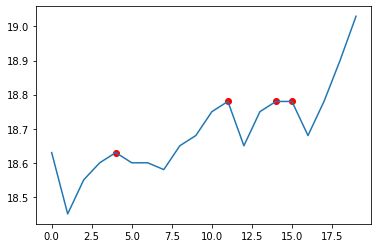

In [67]:
plt.plot(x, y)
plt.scatter(x[peak_loc], y[peak_loc], color='red')

In [68]:
# as you see we found the peak locations !

In [69]:
# now we scale up our plot to 1000 values from dataset

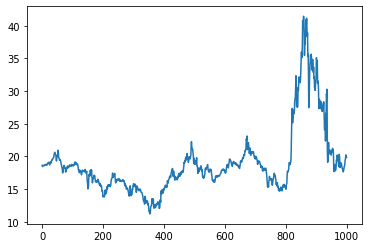

In [70]:
y = df.Price.values[:1000]
x = np.arange(len(y))
plt.plot(x, y)

In [78]:
w = sliding_window_view(y, window_shape=51)

In [79]:
def f(x):
    mid = len(x)//2
    return np.all(x[mid] >= x)

peak_loc = np.apply_along_axis(f, 1, w)
peak_loc = np.concatenate([[False]*25, peak_loc, [False]*25])

<IPython.core.display.Javascript object>


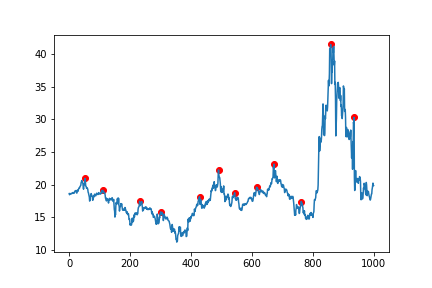

In [80]:
plt.plot(x, y)
plt.scatter(x[peak_loc], y[peak_loc], color='red')